In [1]:
import pandas as pd
from sklearn.metrics import roc_auc_score
from scipy import stats
import matplotlib.pyplot as plt

from src.reactions.e2_sn2.e2_sn2_dataset import *
from src.reactions.e2_sn2.e2_sn2_dataset import E2Sn2Dataset

/home/rhjvanworkum/anaconda3/envs/ts/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/rhjvanworkum/anaconda3/envs/ts/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


PearsonRResult(statistic=0.6925892627135747, pvalue=9.611548949272487e-48)


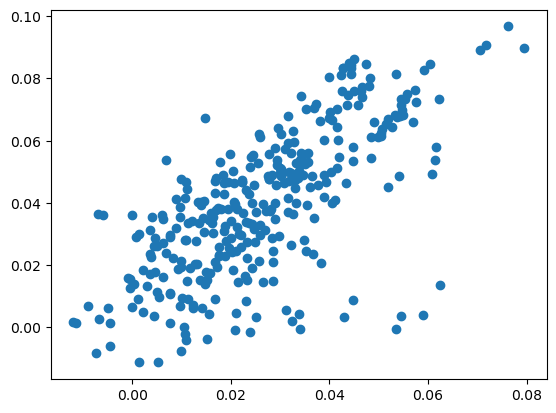

In [2]:
dataset = XtbSimulatedE2Sn2Dataset(
    csv_file_path="xtb_simulated_sn2.csv"
)

df = dataset.load(
    aggregation_mode='avg',
    mode='regression'
)

targets, preds = [], []
for idx in df['reaction_idx'].unique():
    target = df[(df['reaction_idx'] == idx) & (df['simulation_idx'] == 0)]['label']
    pred = df[(df['reaction_idx'] == idx) & (df['simulation_idx'] == 1)]['label']
    
    if len(pred) > 0 and len(target) > 0:
        targets.append(target.values[0])
        preds.append(pred.values[0])
        
print(stats.pearsonr(preds, targets))

plt.scatter(preds, targets)

In [3]:
nucs = []
for idx in df['reaction_idx'].unique():
    smiles = df[(df['reaction_idx'] == idx) & (df['simulation_idx'] == 0)]['substrates'].values[0]
    if len(smiles.split('.')[0]) <= 5:
        nucs.append(smiles.split('.')[0])
    else:
        nucs.append(smiles.split('.')[1])
        
for key in set(nucs):
    print(key, nucs.count(key))

[Br-] 26
[F-] 143
[H+] 52
[Cl-] 105


PearsonRResult(statistic=0.8299442537789283, pvalue=3.957395656242082e-84)


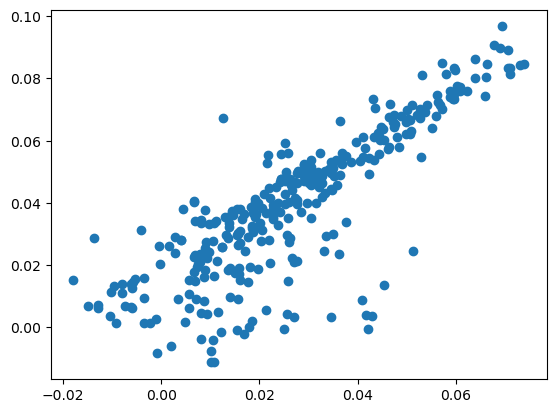

In [4]:
dataset = PyscfSimulatedE2Sn2Dataset(
    csv_file_path="pyscf_b3lyp_6-311g_simulated_sn2.csv"
)

df = dataset.load(
    aggregation_mode='avg',
    mode='regression'
)

targets, preds = [], []
for idx in df['reaction_idx'].unique():
    target = df[(df['reaction_idx'] == idx) & (df['simulation_idx'] == 0)]['label']
    pred = df[(df['reaction_idx'] == idx) & (df['simulation_idx'] == 1)]['label']
    
    if len(pred) > 0 and len(target) > 0:
        targets.append(target.values[0])
        preds.append(pred.values[0])
        
print(stats.pearsonr(preds, targets))

plt.scatter(preds, targets)

In [5]:
nucs = []
for idx in df['reaction_idx'].unique():
    smiles = df[(df['reaction_idx'] == idx) & (df['simulation_idx'] == 0)]['substrates'].values[0]
    if len(smiles.split('.')[0]) <= 5:
        nucs.append(smiles.split('.')[0])
    else:
        nucs.append(smiles.split('.')[1])
        
for key in set(nucs):
    print(key, nucs.count(key))

[Br-] 26
[F-] 143
[H+] 52
[Cl-] 105


PearsonRResult(statistic=0.3322289453965811, pvalue=2.7126543332772393e-09)


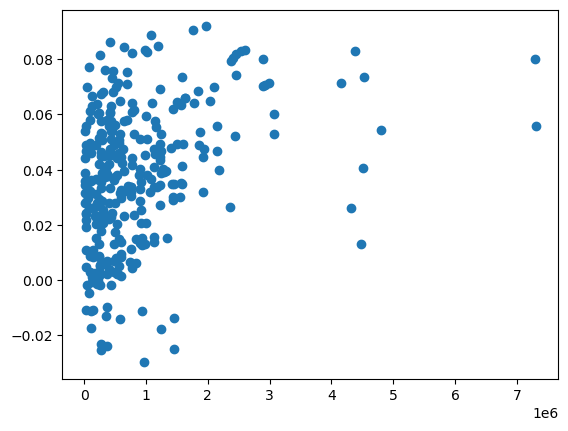

In [6]:
dataset = FFSimulatedE2Sn2Dataset(
    csv_file_path="ff_4_simulated_sn2.csv",
    n_simulations=4
)

df = dataset.load(
    aggregation_mode="low",
    mode='regression'
)

targets, preds = [], []
for idx in df['reaction_idx'].unique():
    target = df[(df['reaction_idx'] == idx) & (df['simulation_idx'] == 0)]['label']
    pred = df[(df['reaction_idx'] == idx) & (df['simulation_idx'] == 4)]['label']

    if len(pred) > 0 and len(target) > 0:
        targets.append(target.values[0])
        preds.append(pred.values[0])
   
print(stats.pearsonr(preds, targets))
plt.scatter(preds, targets)

In [7]:
nucs = []
for idx in df['reaction_idx'].unique():
    smiles = df[(df['reaction_idx'] == idx) & (df['simulation_idx'] == 2)]['substrates'].values
    if len(smiles) > 0:
        if len(smiles[0].split('.')[0]) <= 5:
            nucs.append(smiles[0].split('.')[0])
        else:
            nucs.append(smiles[0].split('.')[1])
        
for key in set(nucs):
    print(key, nucs.count(key))


[Br-] 26
[F-] 143
[H+] 31
[Cl-] 105


/home/rhjvanworkum/anaconda3/envs/ts/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/rhjvanworkum/anaconda3/envs/ts/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/rhjvanworkum/anaconda3/envs/ts/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/rhjvanworkum/anaconda3/envs/ts/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/rhjvanworkum/anaconda3/envs/ts/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/rhjvanworkum/anaconda3/envs/ts/lib/python3.8/site-packages/

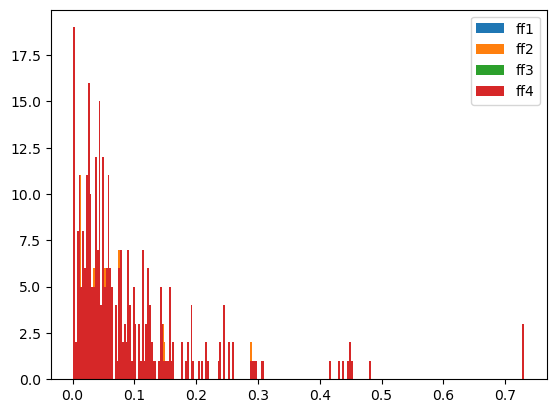

In [8]:
names = ['original', 'ff1', 'ff2', 'ff3', 'ff4']

df = dataset.load(
    aggregation_mode='avg',
    mode='regression'
)

labels = []
for label in df['label']:
    if label > 10:
        labels.append(label / 10000000)
    else:
        labels.append(label)
df['label'] = labels

for sim_idx in [1, 2, 3, 4]:
    data = []
    for idx in df['reaction_idx'].unique():
        row = df[(df['reaction_idx'] == idx) & (df['simulation_idx'] == sim_idx)]['label'].values
        if len(row) == 0:
            data.append(data[-1])
        else:
            data.append(row[0])
    plt.hist(data, bins=250, label=names[sim_idx])

plt.legend()
plt.show()